# Machine Learning-Based Prediction of Chronic Kidney Disease: An Analysis of Risk Factors

## Problem
Chronic kidney disease (CKD) is a prevalent and potentially life-threatening condition affecting millions of people worldwide. Early detection and accurate prediction of CKD can significantly improve patient outcomes by enabling timely interventions and personalized treatment plans. However, traditional diagnostic methods often rely on subjective assessments and are limited in their ability to predict CKD progression. Therefore, there is a pressing need for a machine learning-based approach that can effectively predict the development and progression of CKD using relevant risk factors and patient data.

## Objective (s)
Develop an accurate machine learning model for predicting chronic kidney disease (CKD) using relevant risk factors and patient data, improving early detection and personalized treatment plans.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv("../data/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(400, 26)

In [4]:
# dtypes 
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# check missing data 
data.isnull().sum() 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Descriptive statistics

In [7]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [8]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,391.0,51.4834,17.1697,0.8683,49.7762,53.1905
1,bp,388.0,76.4691,13.6836,0.6947,75.1033,77.8349
2,sg,353.0,1.0174,0.0057,0.0003,1.0168,1.0180
3,al,354.0,1.0169,1.3527,0.0719,0.8756,1.1583
4,su,351.0,0.4501,1.0992,0.0587,0.3348,0.5655
5,bgr,356.0,148.0365,79.2817,4.2019,139.7727,156.3003
6,bu,381.0,57.4257,50.5030,2.5873,52.3384,62.5130
7,sc,383.0,3.0725,5.7411,0.2934,2.4957,3.6493
8,sod,313.0,137.5288,10.4088,0.5883,136.3711,138.6864
9,pot,312.0,4.6272,3.1939,0.1808,4.2715,4.9830


In [9]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
cat_cols.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,rbc,normal,201,81.05
1,,abnormal,47,18.95
2,pc,normal,259,77.31
3,,abnormal,76,22.69
4,pcc,notpresent,354,89.39
...,...,...,...,...
207,ane,no,339,84.96
208,,yes,60,15.04
209,classification,ckd,248,62.00
210,,notckd,150,37.50


## Correlations between Variables 

In [12]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

C:\Users\JHossain\AppData\Local\Temp\ipykernel_6180\427603040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


## Skewness 

In [13]:
# skew 
data.skew() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_6180\942340472.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


id       0.000000
age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
dtype: float64

## Data visualizations

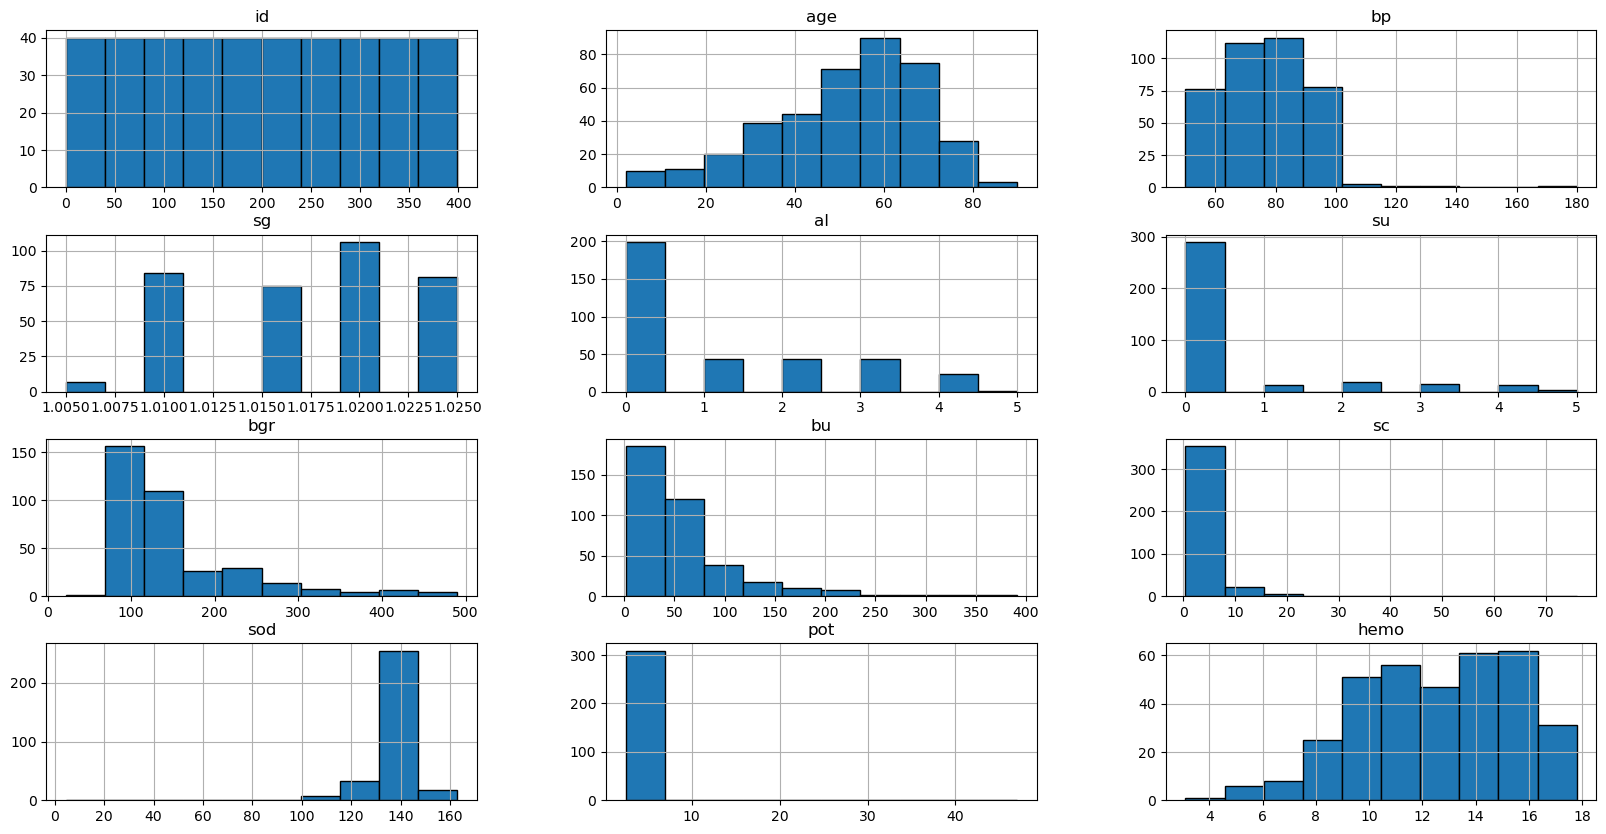

In [14]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

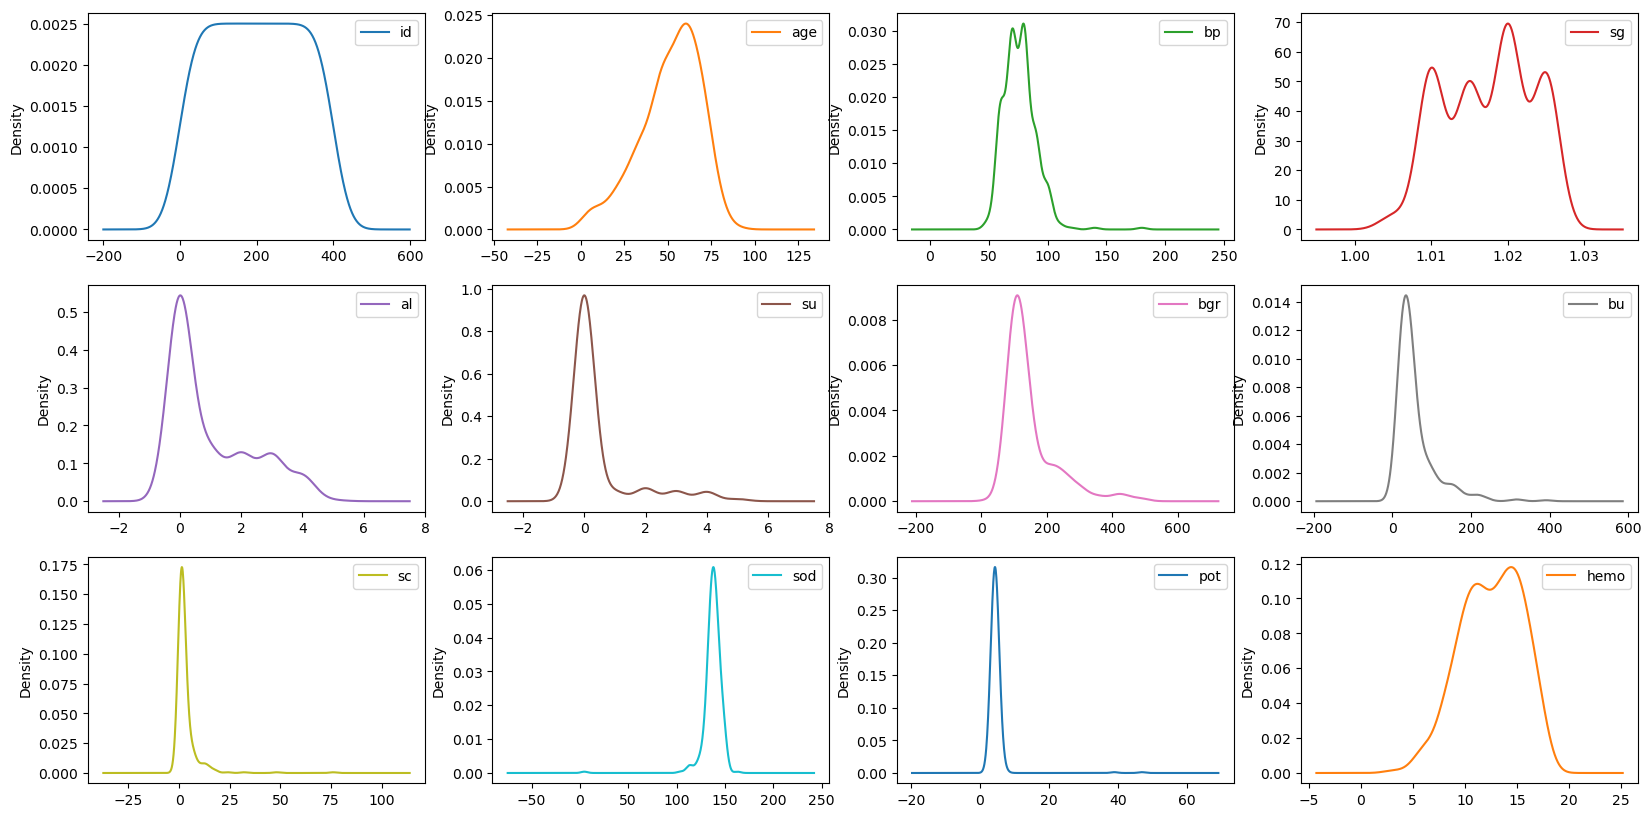

In [15]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

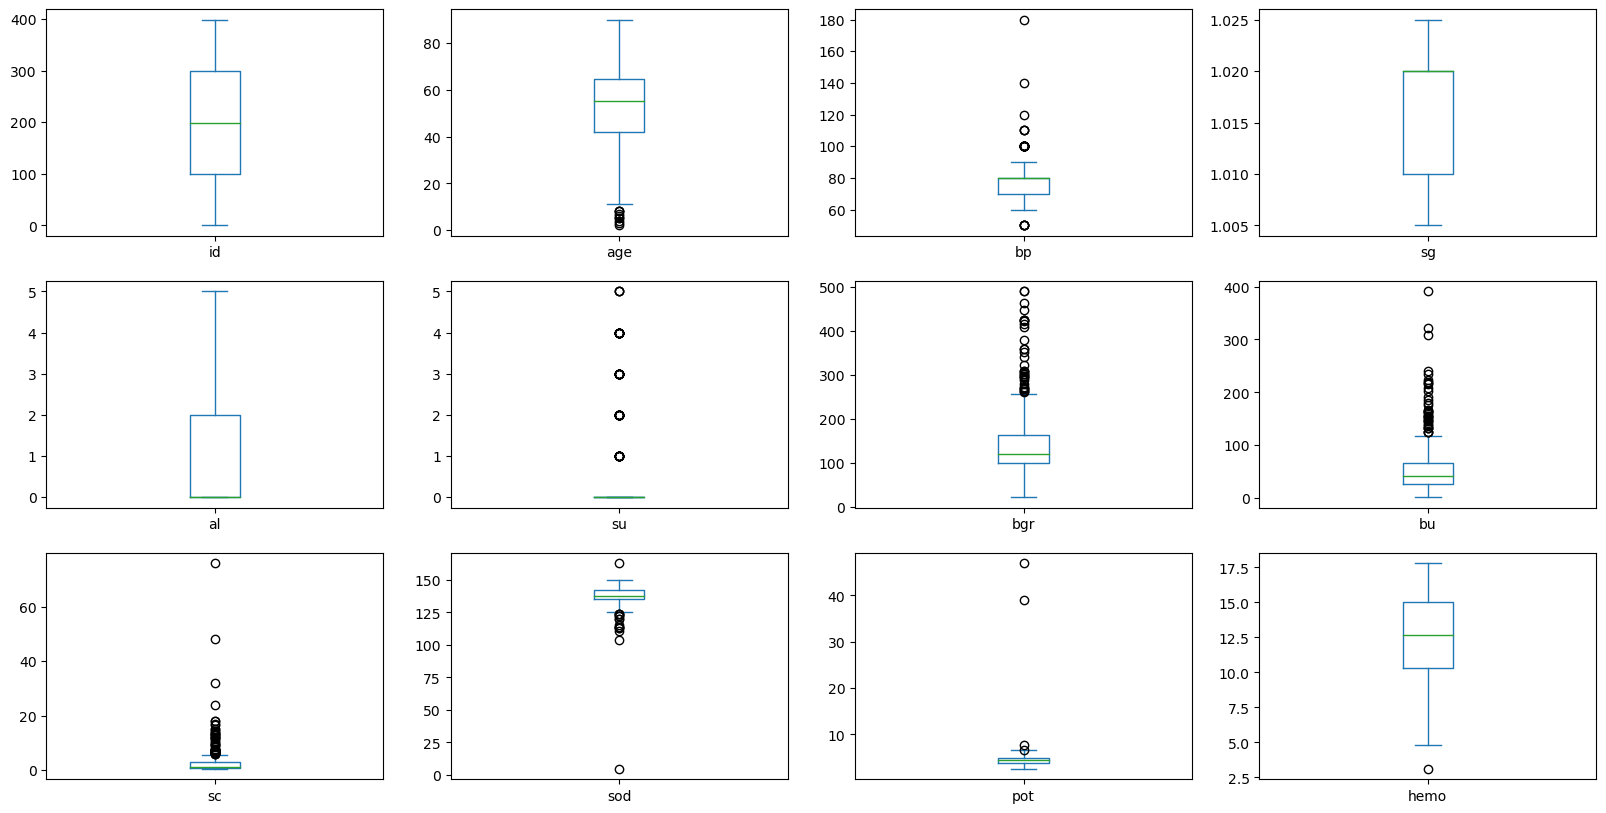

In [16]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_6180\2539154758.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


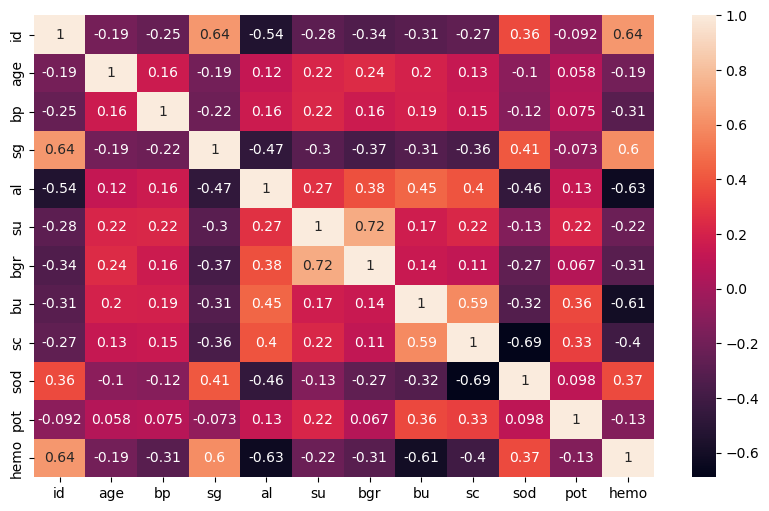

In [17]:
# Multivariate plots with correlations 
plt.figure(figsize=(10,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [18]:
# exmine first few rows of data 
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [19]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'classification', session_id = 123)

,Description,Value
0,Session id,123
1,Target,classification
2,Target type,Multiclass
3,Target mapping,"ckd: 0, ckd : 1, notckd: 2"
4,Original data shape,"(400, 26)"
5,Transformed data shape,"(400, 32)"
6,Transformed train set shape,"(280, 32)"
7,Transformed test set shape,"(120, 32)"
8,Ordinal features,8
9,Numeric features,12


## Compare Models 

In [20]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9964,0.0000,0.9964,0.9931,0.9947,0.9926,0.9929,0.1460
lightgbm,Light Gradient Boosting Machine,0.9964,0.0000,0.9964,0.9931,0.9947,0.9926,0.9929,0.2330
ada,Ada Boost Classifier,0.9929,0.0000,0.9929,0.9931,0.9929,0.9852,0.9859,0.1350
et,Extra Trees Classifier,0.9929,0.0000,0.9929,0.9897,0.9911,0.9850,0.9856,0.1480
knn,K Neighbors Classifier,0.9893,0.0000,0.9893,0.9871,0.9877,0.9777,0.9790,0.2620
lr,Logistic Regression,0.9857,0.0000,0.9857,0.9931,0.9892,0.9709,0.9722,0.5920
gbc,Gradient Boosting Classifier,0.9821,0.0000,0.9821,0.9931,0.9870,0.9649,0.9679,0.1530
dt,Decision Tree Classifier,0.9786,0.0000,0.9786,0.9931,0.9852,0.9577,0.9610,0.1230
ridge,Ridge Classifier,0.9679,0.0000,0.9679,0.9669,0.9664,0.9328,0.9351,0.1220
lda,Linear Discriminant Analysis,0.9607,0.0000,0.9607,0.9766,0.9672,0.9214,0.9261,0.1260


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [21]:
# create model 
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
# print model parameters
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


## Tune Model 

In [23]:
# tune hyperparameters of rf
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [26]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=No...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280,
                                                                           290,
                                                                           300]},
                   pre_dispatch='2*n_jobs', random

## Analyze Model 

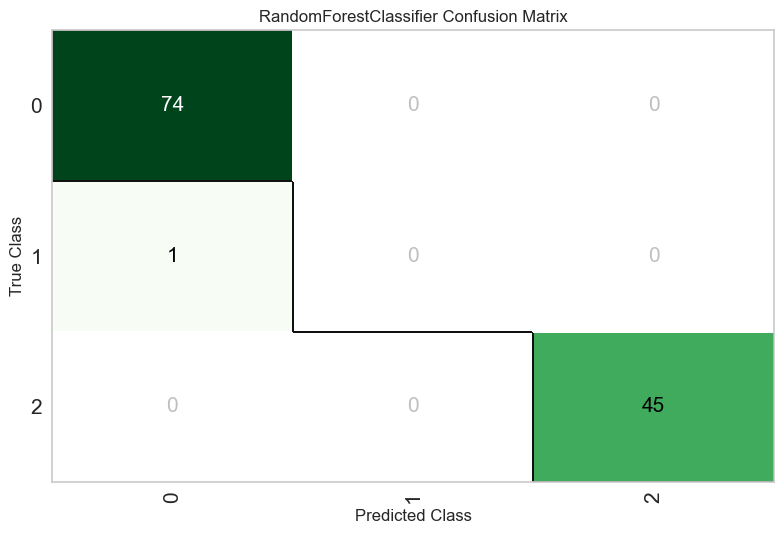

In [27]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

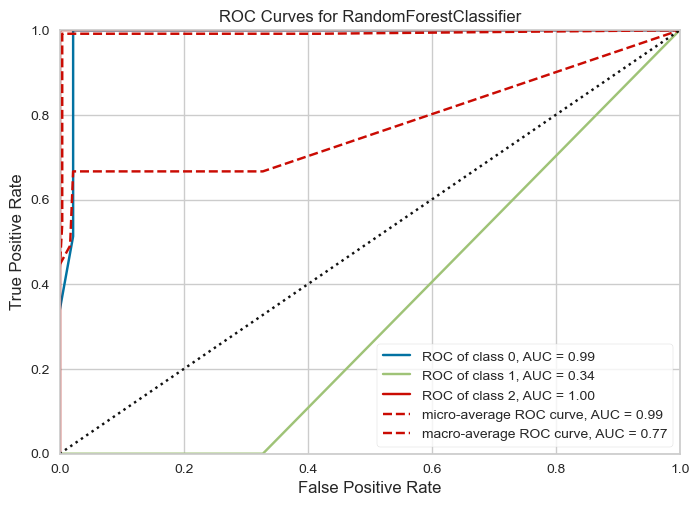

In [28]:
# plot AUC
plot_model(best, plot = 'auc')

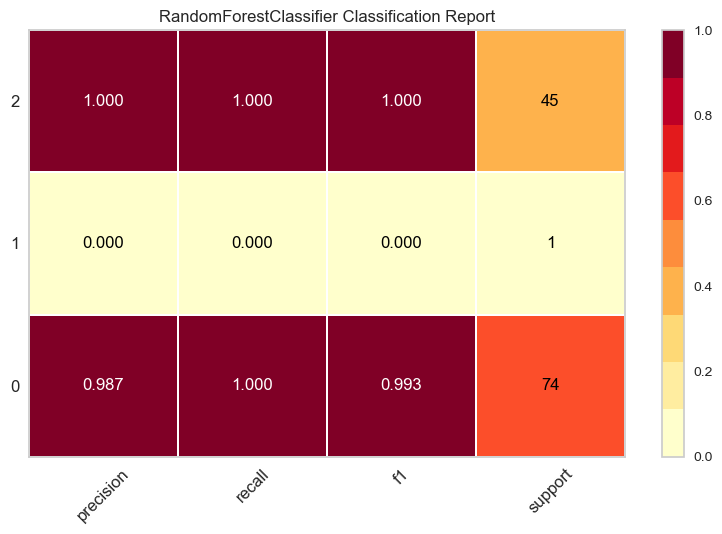

In [29]:
# plot class report
plot_model(best, plot = 'class_report')

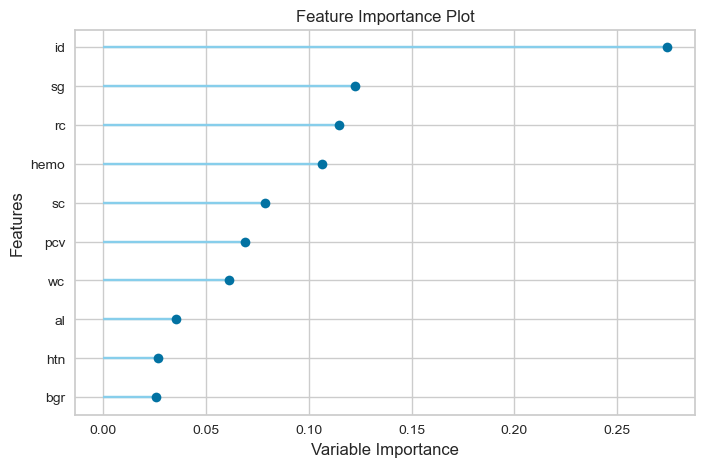

In [30]:
# plot feature importance
plot_model(best, plot = 'feature')

## Evaluate Model 

In [31]:
# evaluate model 
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [32]:
# finalize a model
finalize_model(rf)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'age', 'bp', 'sg', 'al',
                                             'su', 'bgr', 'bu', 'sc', 'sod',
                                             'pot', 'hemo'],
                                    transformer=SimpleImputer(add_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Prediction

In [33]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9917,0,0.9917,0.9834,0.9875,0.9824,0.9826


In [34]:
# show predictions df
holdout_pred.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,prediction_label,prediction_score
247,247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,no,no,no,poor,yes,yes,0,ckd,0.93
69,69,26.0,70.0,1.015,0.0,4.0,NaN,normal,notpresent,notpresent,...,6.0,no,yes,no,good,no,no,0,ckd,0.85
289,289,42.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,5.3,no,no,no,good,no,no,2,notckd,1.00
372,372,72.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,5.5,no,no,no,good,no,no,2,notckd,1.00
139,139,41.0,70.0,1.015,2.0,0.0,NaN,abnormal,notpresent,present,...,NaN,yes,no,no,good,yes,yes,0,ckd,1.00


In [35]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('classification', axis=1, inplace=True)
new_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [36]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,prediction_label,prediction_score
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,0.89
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,0.98
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,0.98
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,1.00
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,1.00


## Save Model 

In [39]:
# save pipeline
save_model(best, '../models/chronic_kidney')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'bp', 'sg', 'al',
                                              'su', 'bgr', 'bu', 'sc', 'sod',
                                              'pot', 'hemo'],
                                     transformer=SimpleImputer(add_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         

In [40]:
# load pipeline
loaded_best_pipeline = load_model('../models/chronic_kidney')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'age', 'bp', 'sg', 'al',
                                             'su', 'bgr', 'bu', 'sc', 'sod',
                                             'pot', 'hemo'],
                                    transformer=SimpleImputer(add_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)